In [91]:
from __future__ import print_function
import os
import numpy as np
from sompy.sompy import SOMFactory
from sompy.visualization.umatrix import UMatrixView

In [6]:
import numpy as np;
import pandas as pd;
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
#import seaborn as sns
%matplotlib inline
# Import the data
tracks = pd.read_csv("../Data/tracks.csv",low_memory=False,header = [0,1],index_col=0)
echonest = pd.read_csv("../Data/echonest.csv",low_memory = False,header = [0,1,2],index_col=0)

In [7]:
tracks.index.rename("Track_ID",inplace=True)
print(tracks.index.name)
echonest.index.rename("Track_ID",inplace=True)
print(echonest.index.name)

Track_ID
Track_ID


In [8]:
echonest_audio_features = echonest['echonest', 'audio_features']
echonest_audio_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
Track_ID,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [9]:
data_with_target = pd.merge(echonest_audio_features,tracks.iloc[:,tracks.columns.get_level_values(1).isin(["genre_top"])],how = "left",left_index = True , right_index = True)
data_with_target.head()

/Applications/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,"(track, genre_top)"
Track_ID,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop


In [10]:
data_with_target.index.name

'Track_ID'

In [11]:
data_with_target.rename(columns = {('track', 'genre_top') : "Target_Genre"},inplace = True)

In [14]:
echonest_audio_features.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [63]:
data = echonest_audio_features.as_matrix()

Using Sompy library in python to implement Self Organizing Maps.
<br>
build is a static function of the class SOMFactory
<br>
Data is the input data which has to be a matrix where rows are the training points and columns represent the features.
<br>
Initialization can be pca or random. PCA gives better results over random. 
<br>
Normalization uses Variance.
<br>
The covariance matrix of the input data is used for finding the first two eigen values and eigen vectors for pca of the data.
<br>
The topographic map is initialized by the first two eigen values only.
<br>
<br>
We tried random initializations as well, but pca initialization performs better than random. Hence pca initialization is used.


In [100]:
sm = SOMFactory.build(data,normalization = 'var', initialization = 'pca')

Since we are not parallelizing the alogrithm, n_jobs = 1 and no shared memory. 
<br>
train_rough_len is the number of iterations for rough training
<br>
train_finetune_len is the number of iterations for fine training
<br>
The difference between rough and fine training is that the radius of the topographic map for the centre point is large for rough and small for fine.
<br>
The basic idea behind this is to initially include the maximum excited neurons for the winning neuron and later to fine tune the clusters.
<br>
A winning neuron is the one which has the maximum excitation for the particular input.
<br>
The neurons are arranged in a two dimensional lattice. Here it is a 24 x 24 map.
<br>
bmu is the best matching unit (neuron in the two dimensional lattice) for the given input.

In [101]:
sm.train(n_job = 1, shared_memory='no',verbose = 'debug',train_rough_len=10, train_finetune_len=10)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 13129 and data dimension is 8
      > map size is 24,24
      > array size in log10 scale is 7.781744118742183
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.025000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 10

 find_bmu took: 0.333000 seconds
 update_codebook_voronoi took: 0.007000 seconds
 epoch: 1 ---> elapsed time:  0.351000, quantization error: 2.076228

 find_bmu took: 0.214000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 2 ---> elapsed time:  0.228000, quantization error: 1.941512

 find_bmu took: 0.221000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 3 ---> elapsed time:  0.232000, quantization error: 1.747980

 find_bmu took: 0.214000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 4 ---> 

Average quantization error measures the distance between each data point and it's nearest best matching unit.
<br>
It measures map resolution.
<br>
<br>
topographic error is the proportion of all the data vectors for which the first and second 'Best Matching Units' are not adjacent.

In [97]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0; Quantization error = 1.12686704944


In [104]:
from sompy.visualization.mapview import View2D
x = str(echonest_audio_features.columns)

2 dimensional view of the features.

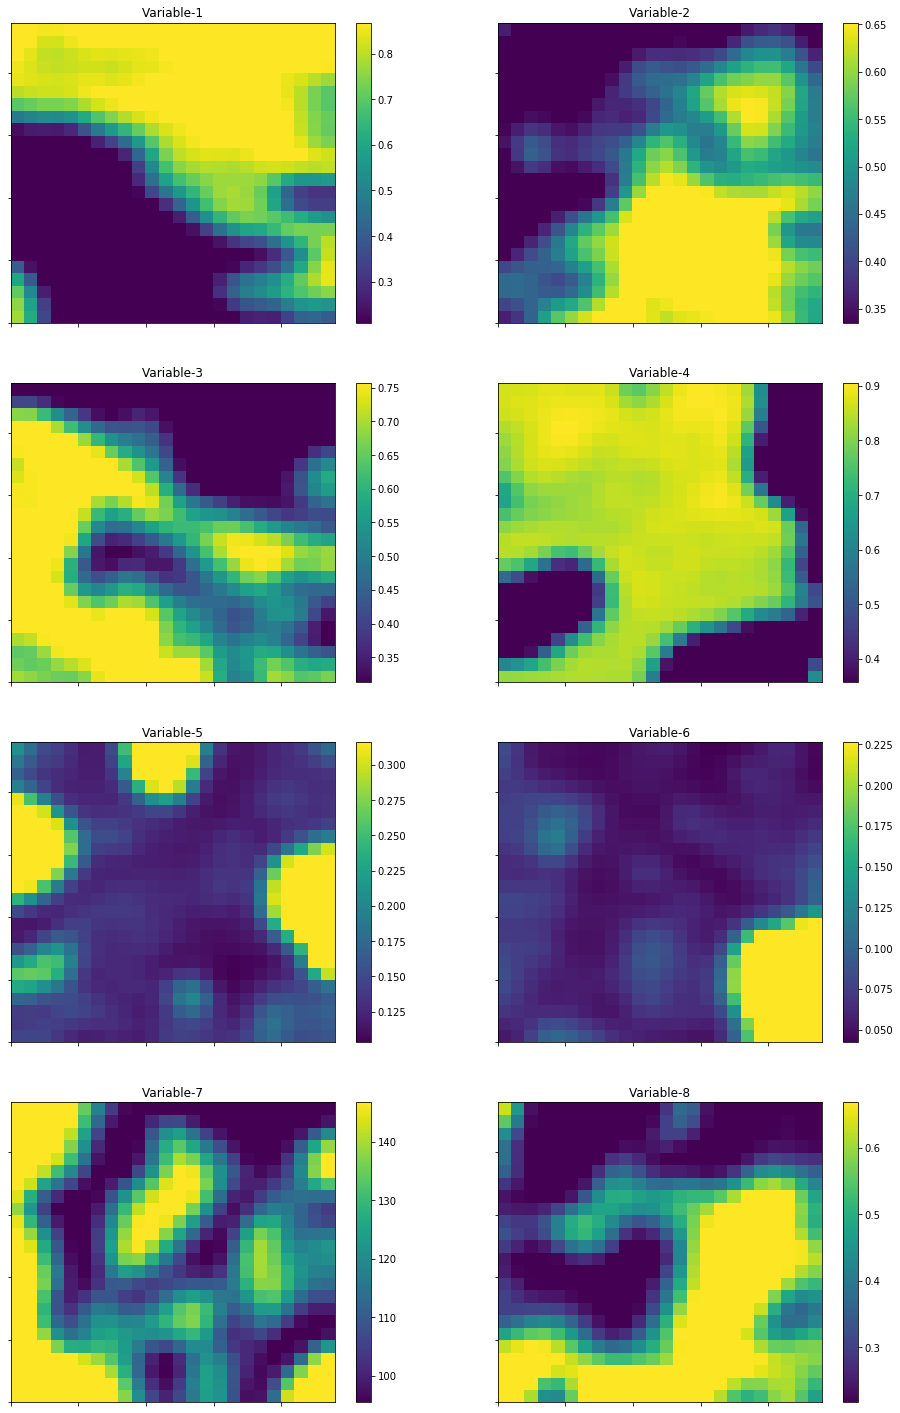

In [105]:
view2D  = View2D(100,100,x,text_size=10)
view2D.show(sm, col_sz=2, which_dim="all", desnormalize=True)

Unified distance matrix

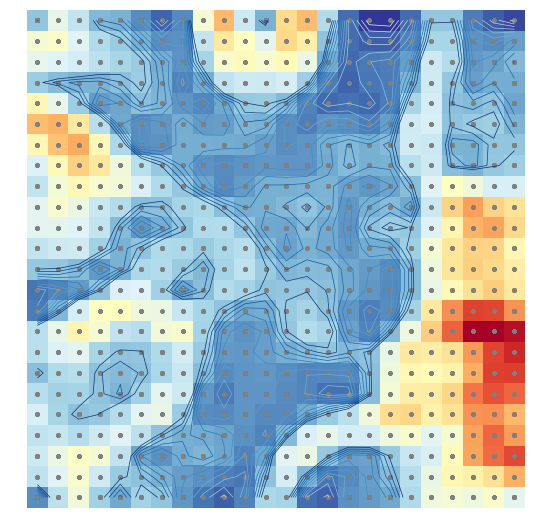

([], array([[ 0.45473317,  0.5783715 ,  0.52034789,  0.43235486,  0.42263902,
          0.36996426,  0.32061464,  0.36755117,  0.60631602,  0.75872927,
          0.5344056 ,  0.4223932 ,  0.71239696,  0.75718834,  0.49523517,
          0.33289792,  0.27008831,  0.26607828,  0.33090029,  0.45574522,
          0.4569309 ,  0.35266683,  0.31373594,  0.28814961],
        [ 0.60437445,  0.62251355,  0.56434611,  0.4941372 ,  0.46548009,
          0.42348874,  0.37221474,  0.37589024,  0.52192324,  0.68403488,
          0.62829715,  0.56757504,  0.71330469,  0.66795218,  0.44954987,
          0.33398514,  0.31582511,  0.31511074,  0.35726398,  0.48251075,
          0.48235553,  0.37830126,  0.37077018,  0.39639182],
        [ 0.5760574 ,  0.5583185 ,  0.54542082,  0.51132409,  0.48298421,
          0.4662578 ,  0.4170745 ,  0.3778742 ,  0.48070987,  0.61463258,
          0.63970817,  0.61389272,  0.64245736,  0.58524766,  0.41340948,
          0.32731408,  0.34852023,  0.35337242,  0.3977377

In [106]:
umat  = UMatrixView(100,100,"Unified Distance Matrix", text_size=14)
umat.show(sm)

In [85]:
from sompy.visualization.bmuhits import BmuHitsView

BMUHitsView gives the number of hits for getting the best matching units

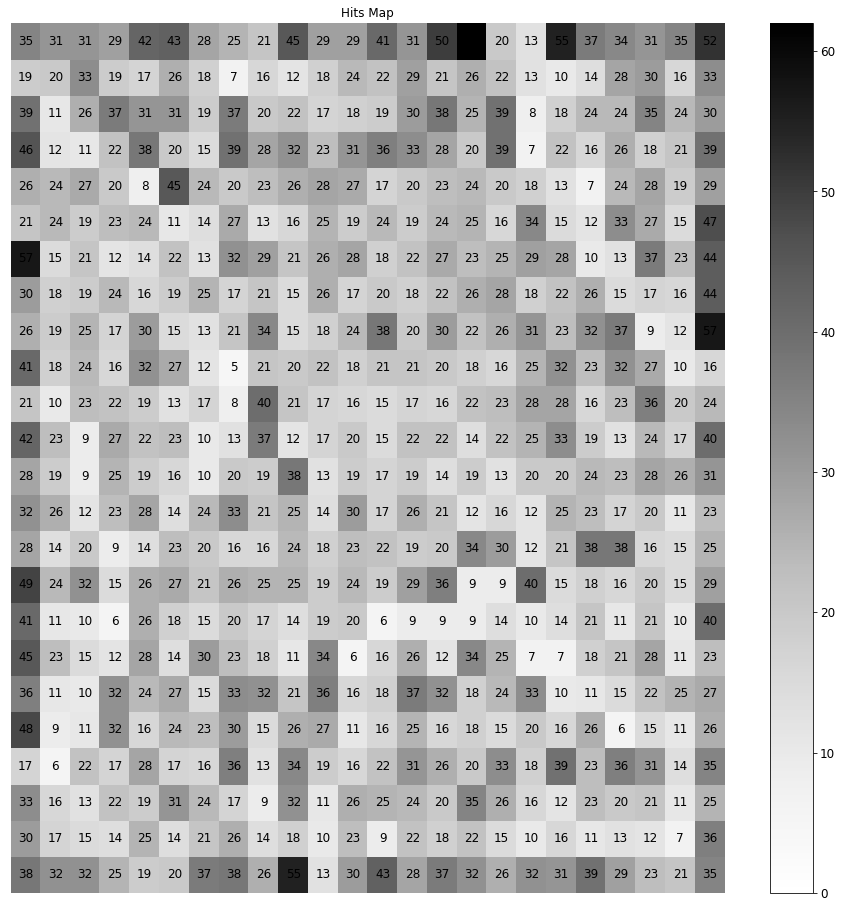

In [86]:
vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

K Means clustering

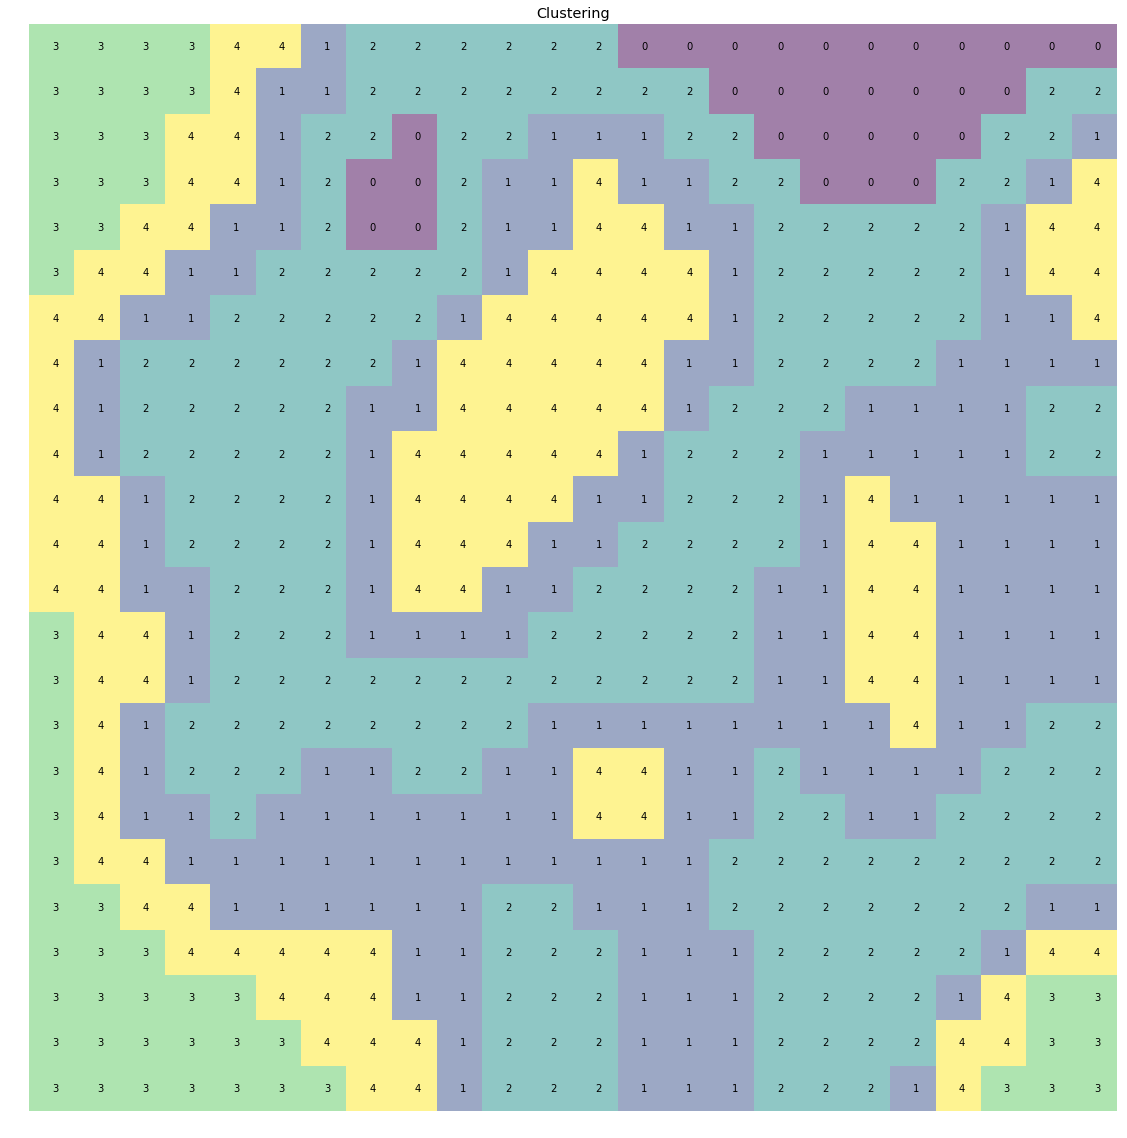

In [108]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a=hits.show(sm)
